In [60]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataHouse = pd.read_csv('housing.csv')

In [4]:
dataHouse.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
dataHouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000015CC29E400>,
      dtype=object)

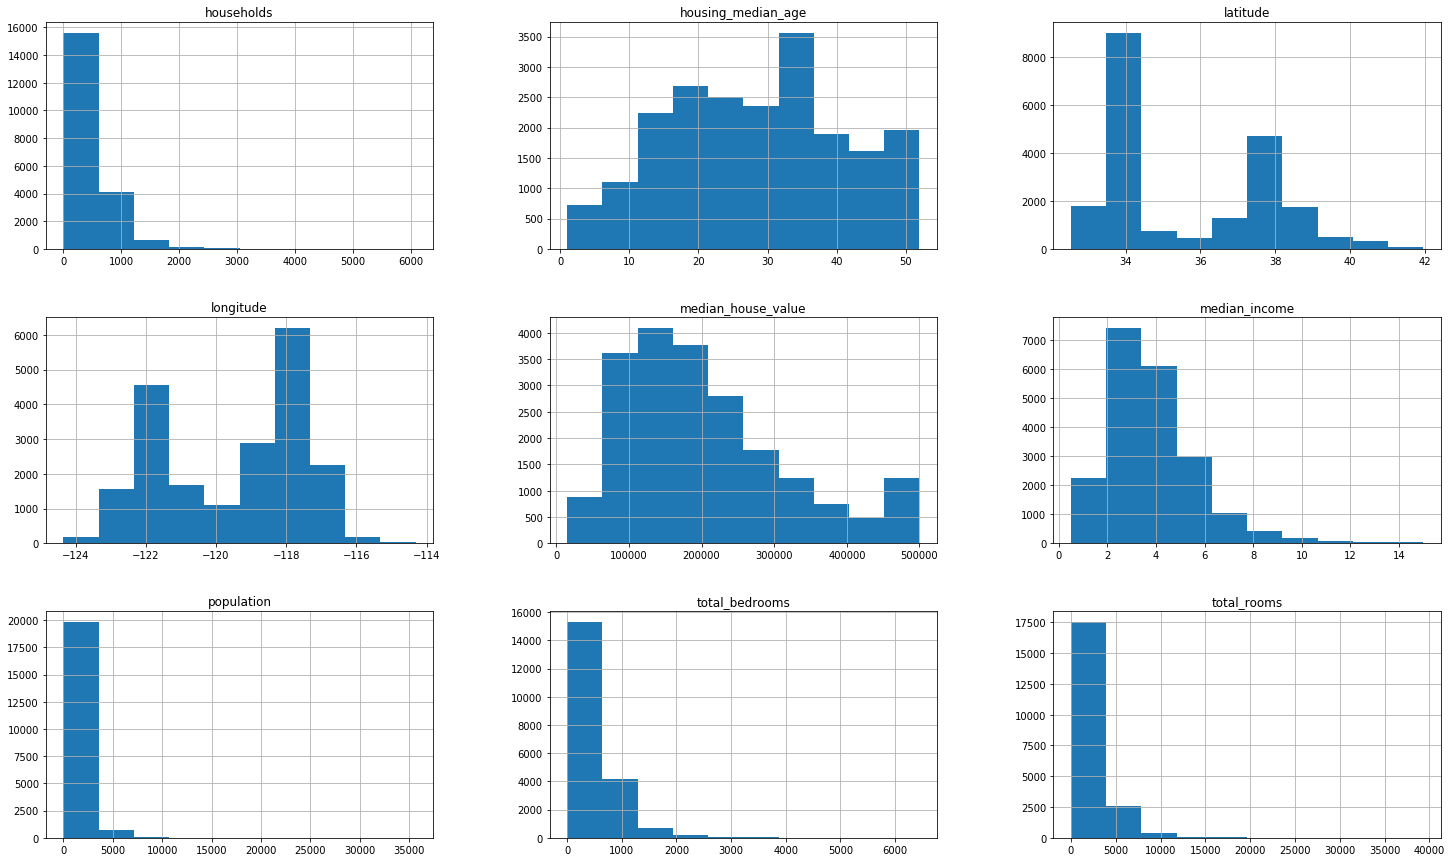

In [10]:
dataHouse.hist(bins=10,figsize=(25,15))

In [11]:
#defining feature and labels
x = dataHouse.drop('median_house_value',axis=1).values
y = dataHouse.median_house_value.values

In [12]:
#Checking the shape of X
x.shape

(20640, 9)

In [15]:
#nan dataset values to deal with
from sklearn.preprocessing import Imputer
impute = Imputer(missing_values='NaN',strategy ='mean', axis = 0)
x[:,[4]]  = impute.fit_transform(x[:,[4]])

In [17]:
#Lable encoding the categorical data i.e. column ocean_proximity
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
x[:,8] = encode.fit_transform(x[:,8])

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[8])
x = ohe.fit_transform(x).toarray()

In [21]:
#Identifying the required features
dataHouse.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [23]:
X_final = dataHouse.iloc[:,[2,3,7]].values

In [24]:
#Creating Train test data
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_final,y,test_size = .2, random_state =0)

In [25]:
#Standardizing X_final and X_test

from sklearn.preprocessing import StandardScaler
ss  = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [26]:
#Creating model for LR
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
#Defined y_predict
y_prediction = model.predict(X_test)

In [28]:
#Checking the score for train data
model.score(X_train,y_train)

0.5196284575917456

In [29]:
#Checking the score for test data
model.score(X_test,y_test)

0.48826521027801695

In [30]:
#Predicting the model
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_prediction)))

81687.15246248957


In [32]:
# Performing DecissionTree in Dataset
X_DT = dataHouse.iloc[:,[2,3,7]].values

In [33]:
from sklearn.cross_validation import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_DT,
                                                 y,
                                                 test_size=.2,random_state=0)

In [35]:
#Creating model for DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
secondModel= DecisionTreeRegressor(random_state = 0)
secondModel.fit(X_train2,y_train2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [36]:
secondModel.score(X_train2,y_train2)

1.0

In [37]:
secondModel.score(X_test2,y_test2)

0.12316568402304573

In [38]:
y_pred2 = model2.predict(X_test2)

In [39]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test2,y_pred2))

11433524048.35974


In [41]:
#Performing Random Forest
X_RF = dataHouse.iloc[:,[2,3,7]].values

In [42]:
from sklearn.cross_validation import train_test_split
X_train3,X_test3,y_train3,y_test3 = train_test_split(X_RF,
                                                 y,
                                                 test_size=.2, random_state=0)

In [43]:
from sklearn.ensemble import RandomForestRegressor
thirdModel = RandomForestRegressor()
thirdModel.fit(X_train3,y_train3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
thirdModel.score(X_train3,y_train3)

0.9087486103829935

In [45]:
thirdModel.score(X_test3,y_test3)

0.4584381679896252

In [46]:
y_predict3 = thirdModel.predict(X_test3)

In [47]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test3,y_predict3))

7061722057.565001


In [48]:
#Perform Regression with one Independent Variable
#We select Median income since it has higher correlation
X_SLR = dataHouse.median_income.values
X_SLR = X_SLR.reshape(-1,1)

In [49]:
from sklearn.cross_validation import train_test_split
X_train4,X_test4,y_train4,y_test4 = train_test_split(X_SLR,
                                                 y,
                                                 test_size=.2, random_state=0)

In [50]:
from sklearn.linear_model import LinearRegression
model_SLR = LinearRegression()
model_SLR.fit(X_train4,y_train4)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
model_SLR.score(X_train4,y_train4)

0.479914127199415

In [52]:
model_SLR.score(X_test4,y_test4)

0.4466846804895944

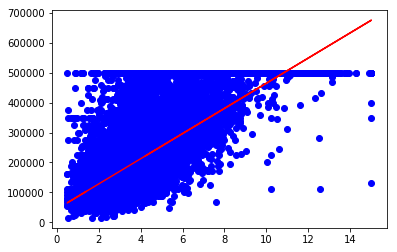

In [53]:
#Ploting on Training Set
plt.scatter(X_train4,y_train4,color='b')
plt.plot(X_train4,model_SLR.predict(X_train4), color='r')

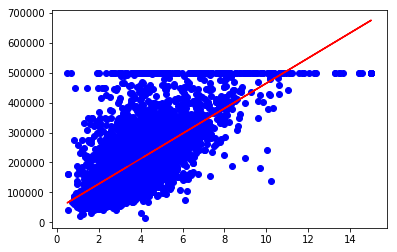

In [54]:
#Ploting on Testing Set
plt.scatter(X_test4,y_test4,color='b')
plt.plot(X_test4,model_SLR.predict(X_test4), color='r')